# Logistic Regression


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class LogisticRegression():
    def __init__(self, degree, learning_rate, iterations, Lambda):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.Lambda = Lambda
        
    def transform(self, X):
        X_transformed = []
        x1 = X[:, 0].reshape(X.shape[0], 1)
        x2 = X[:, 1].reshape(X.shape[0], 1)
        for i in range(1, self.degree + 1):
            for j in range(0, i + 1):
                power_x1 = i - j
                power_x2 = j
                X_transformed.append((x1 ** power_x1) * (x2 ** power_x2))  
        return np.squeeze(np.array(X_transformed)).T
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def h_theta(self, X, theta):
        z = X.dot(theta)
        return self.sigmoid(z)

    def scale_features(self, X, mode='train'):
        if mode == 'train':
            self.mean = np.mean(X, axis = 0) 
            self.sd = np.std(X, axis = 0) 
        X_scaled = (X-self.mean)/self.sd
        return X_scaled
    
    def batch_gradient_descent(self):
        m = len(self.X_train)
        theta = np.zeros((self.X_train.shape[1], 1))
        for iteration in range(self.iterations):
            gradients = 1 / m * (self.X_train.T.dot(self.h_theta(self.X_train, theta) - self.y_train) + self.Lambda * theta)
            theta -= self.learning_rate * gradients
        return theta
    
    def fit(self, X_train, y_train):
        X_transformed = self.transform(X_train)
        X_scaled = self.scale_features(X_transformed)
        self.X_train = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        self.y_train = y_train
        self.theta = self.batch_gradient_descent()
        
    def predict(self, X_test):
        X_transformed = self.transform(X_test)
        X_scaled = self.scale_features(X_transformed, mode='test')
        X_test = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        return np.where(self.h_theta(X_test, self.theta) > 0.5, 1.0, 0.0)

## First Case

In [3]:
def dataset1(n):
    center1 = [1.5, 0]
    radius1 = [4, 9]
    
    r1 = np.random.random(n)*(radius1[1]-radius1[0]) + radius1[0]
    alpha1= 2 * np.pi * np.random.random(n)
    points1 = np.vstack((r1*np.cos(alpha1)+center1[0], r1*np.sin(alpha1)+center1[1])).T
    
    center2 = [1.5, 0]
    radius2 = [0, 6]
    
    r2 = np.random.random(n)*(radius2[1]-radius2[0]) + radius2[0]
    alpha2 = 2 * np.pi * np.random.random(n)
    points2 = np.vstack((r2*np.cos(alpha1)+center2[0], r2*np.sin(alpha1)+center2[1])).T

    return [np.vstack((points1,points2)), np.vstack((np.zeros((n,1)),np.ones((n,1))))]

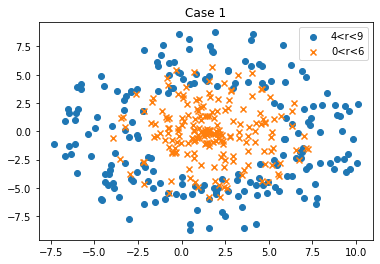

In [4]:
size=200
[X1, Y1] = dataset1(size)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

plt.scatter(X1[:size,0],X1[:size,1],marker='o', label = '4<r<9') 
plt.scatter(X1[size:,0],X1[size:,1],marker='x', label = '0<r<6')
plt.title('Case 1')
plt.legend()
plt.show()

In [5]:
models = []
for deg in range(1, 10):
    print(f'degree {deg}: ', end='')
    model = LogisticRegression(deg, 0.01, 5000, 0.001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    acc = (y_pred == y_test).sum()/len(y_test)*100
    print(f'{acc}%')

degree 1: 63.33333333333333%
degree 2: 77.5%
degree 3: 76.66666666666667%
degree 4: 76.66666666666667%
degree 5: 76.66666666666667%
degree 6: 76.66666666666667%
degree 7: 76.66666666666667%
degree 8: 77.5%
degree 9: 77.5%


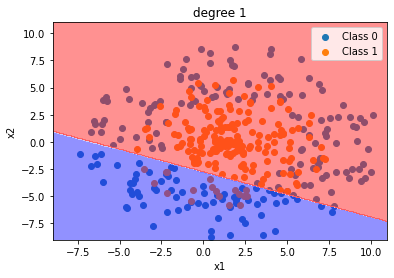

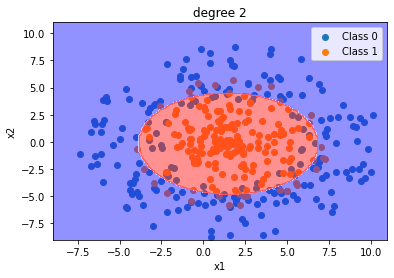

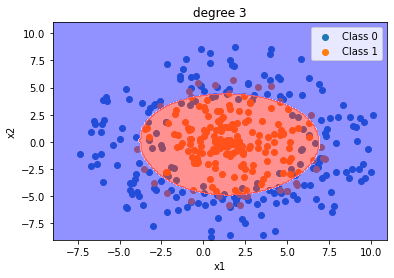

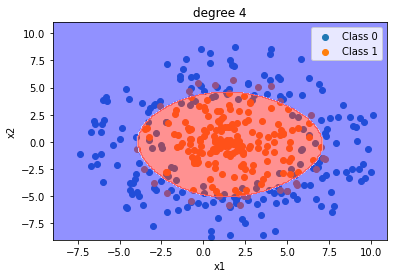

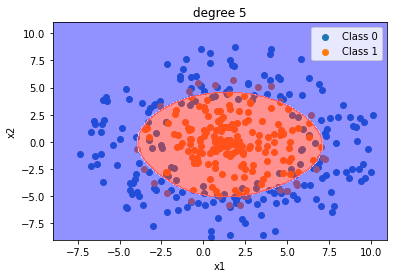

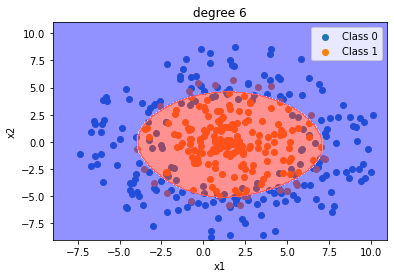

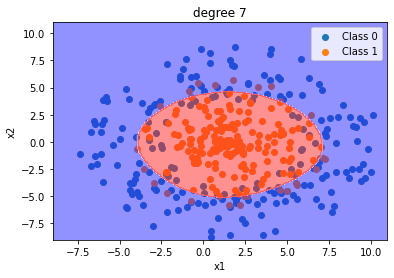

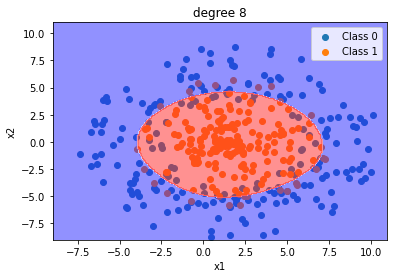

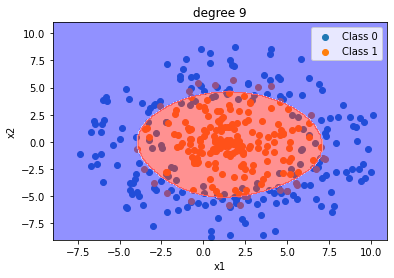

In [6]:
for deg in range(9):
    model = models[deg]
    x1grid = np.linspace(-9, 11, 220)
    x2grid = np.linspace(-9, 11, 220)
    x1, x2 = np.meshgrid(x1grid, x2grid)
    x1, x2 = x1.flatten().reshape((-1, 1)), x2.flatten().reshape((-1, 1))
    grid = np.hstack((x1, x2))
    U = x1.reshape((len(x1grid), len(x2grid)))
    V = x2.reshape((len(x1grid), len(x2grid)))
    Z = model.predict(grid).reshape((len(x1grid), len(x2grid)))
    mask0 = (Y1 == 0).reshape(-1)
    mask1 = (Y1 == 1).reshape(-1)
    plt.scatter(X1[mask0, :][:, 0], X1[mask0][:, 1], label='Class 0')
    plt.scatter(X1[mask1, :][:, 0], X1[mask1][:, 1], label='Class 1')
    plt.contourf(U, V, Z, cmap='bwr', alpha=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'degree {deg+1}')
    plt.legend()
    plt.show()

## Second Case

In [7]:
def dataset2(n): 
    mean = [1, 0]
    std = 1
     
    points1 = np.random.normal(loc=mean, scale=std, size=(100, 2))
     
    center2 = [1.5, 0] 
    radius2 = [2, 6] 
     
    r2 = np.random.random(2*n)*(radius2[1]-radius2[0]) + radius2[0] 
    alpha2 = 2 * np.pi * np.random.random(2*n) 
    points2 = np.vstack((r2*np.cos(alpha2)+center2[0], r2*np.sin(alpha2)+center2[1])).T 
 
    return [np.vstack((points1,points2)), np.vstack((np.zeros((n,1)),np.ones((2*n,1))))]

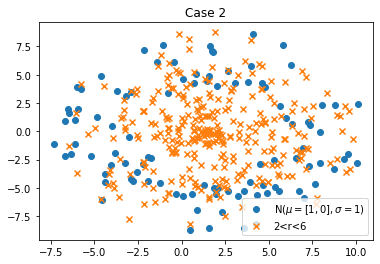

In [8]:
size = 100
[X2, Y2] = dataset2(size)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

plt.scatter(X1[:size,0],X1[:size,1],marker='o', label = 'N($\mu=[1, 0], \sigma=1$)') 
plt.scatter(X1[size:,0],X1[size:,1],marker='x', label = '2<r<6')
plt.title('Case 2')
plt.legend()
plt.show()

In [9]:
models = []
for deg in range(1, 10):
    print(f'degree {deg}: ', end='')
    model = LogisticRegression(deg, 0.01, 5000, 0.001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    acc = (y_pred == y_test).sum()/len(y_test)*100
    print(f'{acc}%')

degree 1: 63.33333333333333%
degree 2: 77.5%
degree 3: 76.66666666666667%
degree 4: 76.66666666666667%
degree 5: 76.66666666666667%
degree 6: 76.66666666666667%
degree 7: 76.66666666666667%
degree 8: 77.5%
degree 9: 77.5%


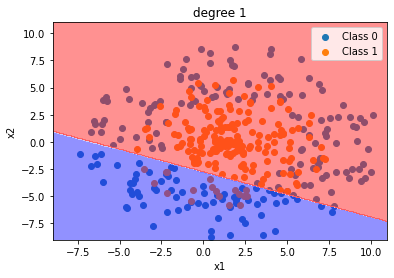

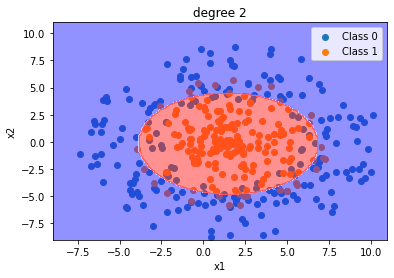

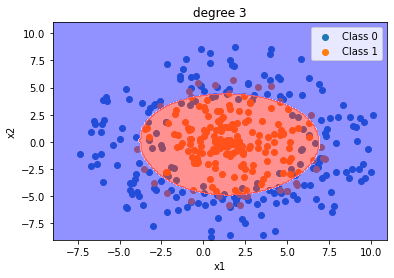

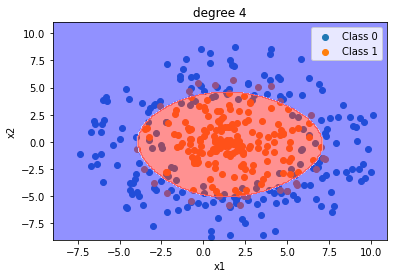

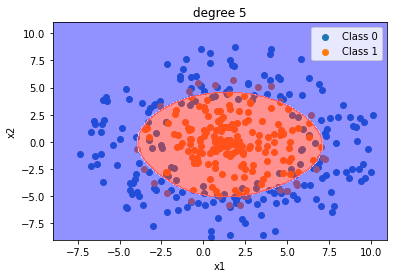

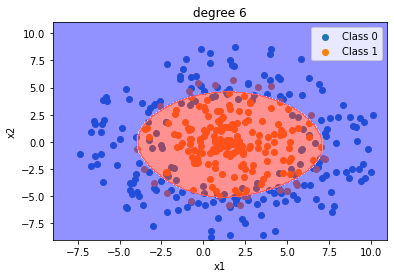

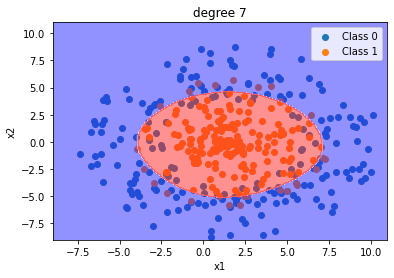

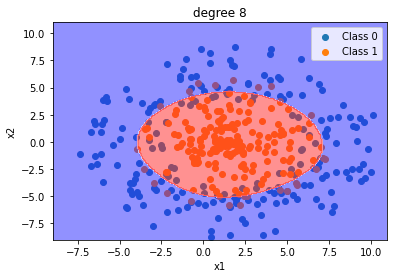

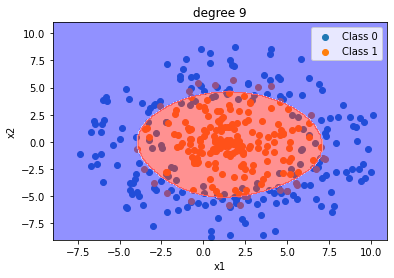

In [10]:
for deg in range(9):
    model = models[deg]
    x1grid = np.linspace(-9, 11, 220)
    x2grid = np.linspace(-9, 11, 220)
    x1, x2 = np.meshgrid(x1grid, x2grid)
    x1, x2 = x1.flatten().reshape((-1, 1)), x2.flatten().reshape((-1, 1))
    grid = np.hstack((x1, x2))
    U = x1.reshape((len(x1grid), len(x2grid)))
    V = x2.reshape((len(x1grid), len(x2grid)))
    Z = model.predict(grid).reshape((len(x1grid), len(x2grid)))
    mask0 = (Y1 == 0).reshape(-1)
    mask1 = (Y1 == 1).reshape(-1)
    plt.scatter(X1[mask0, :][:, 0], X1[mask0][:, 1], label='Class 0')
    plt.scatter(X1[mask1, :][:, 0], X1[mask1][:, 1], label='Class 1')
    plt.contourf(U, V, Z, cmap='bwr', alpha=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'degree {deg+1}')
    plt.legend()
    plt.show()